# House Sales in King County, WA

Fundamental determinant when it comes to selling houses are the the size of the land and the size house itself. And If you have ever browse house price's through the internet, chances are you know a thing or two about figuring out the value of a property. If the asking price is too high, the likelihood of the home being sold greatly decreases. On the other hand, if a home you are looking to sell is priced too low, you’ll miss out on potential profits.

To make sure a home is fairly priced, an analysis towards a house should always be performed, before buying or selling. This analysis will compare the values of homes in King County and what are the factors that affecting price of a house in King County to come up with an accurate market price prediction with machine learning modeling.



# Goals
In this notebook we will do an Exploratory data analysis to figure out what are the factors that's affecting house Price's in King County Washington, after that we will create a machine learning model that will help us predict a house price based on the features.

In [3]:
import pandas as pd  # Pandas is a powerful library for data manipulation and analysis.
import numpy as np  # NumPy is used for numerical operations, including arrays and linear algebra.
import matplotlib.pyplot as plt  # Matplotlib is a library for creating static, animated, and interactive visualizations.
import seaborn as sns  # Seaborn is built on top of Matplotlib, providing an interface for drawing attractive statistical graphics.




In [4]:
# Loading the dataset from a CSV file into a DataFrame called 'data'
# 'pd.read_csv()' is a pandas function used to read CSV (comma-separated values) files
data = pd.read_csv("kc_house_data.csv")

In [5]:
# Displaying the first few rows of the dataset to get a quick overview of its structure
data.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [6]:
data.info()  # Display basic information about the dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

In [7]:
# This line drops all rows that contain any missing (NaN) values.
# The 'inplace=True' argument means the changes will be applied directly to the original dataset 'data',
# instead of creating a new DataFrame. 
data.dropna(inplace=True)

In [8]:
data.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

In [9]:
data   #display all the dataset

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,263000018,20140521T000000,360000.0,3,2.50,1530,1131,3.0,0,0,...,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509
21609,6600060120,20150223T000000,400000.0,4,2.50,2310,5813,2.0,0,0,...,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200
21610,1523300141,20140623T000000,402101.0,2,0.75,1020,1350,2.0,0,0,...,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007
21611,291310100,20150116T000000,400000.0,3,2.50,1600,2388,2.0,0,0,...,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287


In [10]:
# Display the shape of the dataset
data.shape  # This returns a tuple (number of rows, number of columns) in the dataset
# The dataset has 21613 rows and 21 columns

(21613, 21)

- The dataset has 21613 rows and 21 columns

# Columns Summary

In [11]:
column_descr = []
for name in data.columns:
    column_descr.append(
        [
            name,
            data[name].dtypes,  # Get data type of each column
            data[name].isnull().sum(),  # Count the number of missing values
            round(data[name].isnull().sum() / len(data) * 100, 2),  # Calculate the percentage of missing values
            data[name].nunique(),  # Get the number of unique values in the column
            data[name].unique()  # Get all unique values in the column
        ]
    )

# Use 'pd.DataFrame()' to create a new DataFrame
data_column_desc = pd.DataFrame(column_descr, columns=['Column', 'Dtype', 'Null', 'Null (%)', 'nUnique', 'Unique'])

# Print total number of columns
print(f"Total columns in this dataset: {len(data.columns)} columns.")


Total columns in this dataset: 21 columns.


In [12]:
data_column_desc  # This will show the content of the DataFrame when executed

,Column,Dtype,Null,Null (%),nUnique,Unique
0,id,int64,0,0.0,21436,"[7129300520, 6414100192, 5631500400, 248720087..."
1,date,object,0,0.0,372,"[20141013T000000, 20141209T000000, 20150225T00..."
2,price,float64,0,0.0,4028,"[221900.0, 538000.0, 180000.0, 604000.0, 51000..."
3,bedrooms,int64,0,0.0,13,"[3, 2, 4, 5, 1, 6, 7, 0, 8, 9, 11, 10, 33]"
4,bathrooms,float64,0,0.0,30,"[1.0, 2.25, 3.0, 2.0, 4.5, 1.5, 2.5, 1.75, 2.7..."
5,sqft_living,int64,0,0.0,1038,"[1180, 2570, 770, 1960, 1680, 5420, 1715, 1060..."
6,sqft_lot,int64,0,0.0,9782,"[5650, 7242, 10000, 5000, 8080, 101930, 6819, ..."
7,floors,float64,0,0.0,6,"[1.0, 2.0, 1.5, 3.0, 2.5, 3.5]"
8,waterfront,int64,0,0.0,2,"[0, 1]"
9,view,int64,0,0.0,5,"[0, 3, 4, 2, 1]"


In [13]:
# convert 'date' column to datetime
data['date'] = pd.to_datetime(data['date'], format='%Y%m%dT%H%M%S')

Descriptive Stats


In [14]:
data.describe()

## from this describe table we can assume there's going to be outliers in some of the colum by looking from the median and max valaues in certain columns
## the average house price in king county is around 540000 
# the maximum house price in king county is 7.7 million which pretty far from the mean and median
# there's house with no bedroom and house with no bath room which is kind of weird we will investigate this further
# maximum numbers of bedrooms in this dataset is 33
# the average of the houses were built in 1975

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,21613,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,...,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,4.580302e+09,2014-10-29 04:38:01.959931648,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,...,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
min,1.000102e+06,2014-05-02 00:00:00,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,...,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,2014-07-22 00:00:00,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,...,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,2014-10-16 00:00:00,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,...,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,2015-02-17 00:00:00,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,...,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,2015-05-27 00:00:00,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,...,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000
std,2.876566e+09,NaN,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,...,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631


- count: The number of non-null entries in each column.
- mean: The average value of each column.
- std: The standard deviation, which indicates how much the values vary from the mean.
- min: The minimum value in each column.
- 25% (Q1): The first quartile, which is the value below which 25% of the data falls.
- 50% (median): The median value, which is the middle value when the data is sorted.
- 75% (Q3): The third quartile, which is the value below which 75% of the data falls.
- max: The maximum value in each column.

Conclusion from the output:
- from this describe table we can assume there's going to be outliers in some of the colum by looking from the median and max valaues in certain columns
- the average house price in king county is around 540000 
- the maximum house price in king county is 7.7 million which pretty far from the mean and median
- there's house with no bedroom and house with no bath room which is kind of weird we will investigate this further
- maximum numbers of bedrooms in this dataset is 33
 the average of the houses were built in 1975

Checking and Handling Outliers and Random Values

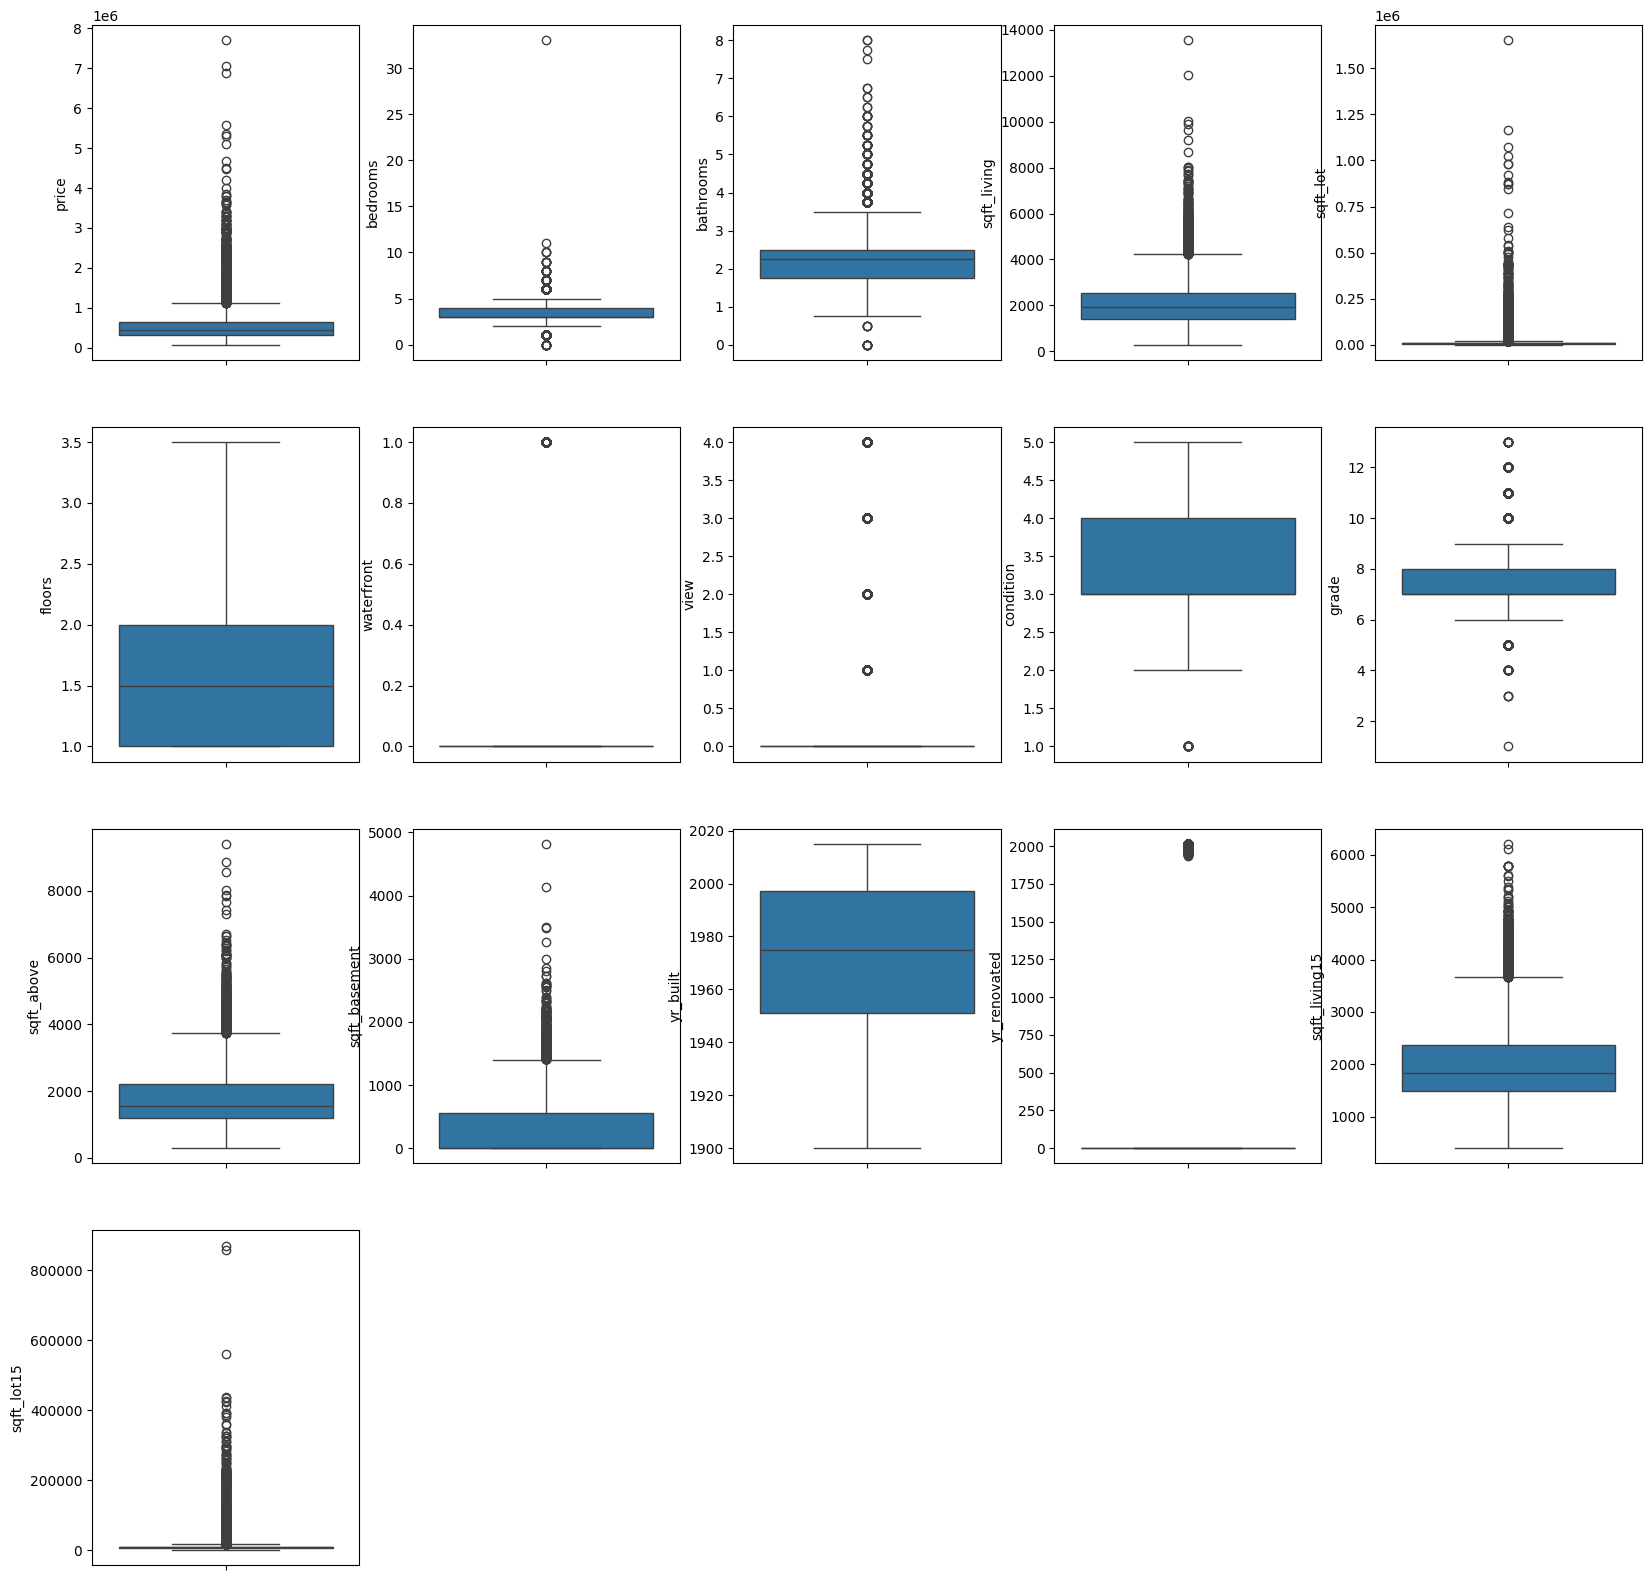

In [15]:
# ploting boxplot for all the columns to see distribution of the data in each columns
# Dropping columns that are not relevant for the boxplot analysis
data_describe = data.drop(columns = ['id', 'date', 'lat','long', 'zipcode'])

# Setting up the figure size for the boxplot visualization
plt.figure(figsize =(20, 20 ))  # Create a large figure to accommodate multiple plots
x = 1  # Initialize a counter for subplot positioning

# Looping through each column in the DataFrame to create individual boxplots
for column in data_describe.columns:
    plt.subplot(4,5,x)    # Create a subplot for each column (4 rows and 5 columns)
    sns.boxplot(data_describe[column])  # Create a boxplot for the current column
    x+=1  # Increment the subplot counter

# Adjust layout to make it visually appealing
plt.tight_layout   # This ensures that the subplots fit well without overlapping

# Display the plots
plt.show()



From this box plot, we can see that there are outliers in many of the columns.
 I will not remove the outliers from the dataset because it's common to have outliers 
 when it comes to house sales in real life, as they can represent exceptional properties 
 that may be of high value or influenced by unique factors.

Checking Houses that has 0 bedrooms or 0 bathrooms

In [16]:
# Checking the value that's unsual 
# bedroom and bathroom that's 0 

data[data['bedrooms'] < 1]

 

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
875,6306400140,2014-06-12,1095000.0,0,0.00,3064,4764,3.5,0,2,...,7,3064,0,1990,0,98102,47.6362,-122.322,2360,4000
3119,3918400017,2015-02-05,380000.0,0,0.00,1470,979,3.0,0,2,...,8,1470,0,2006,0,98133,47.7145,-122.356,1470,1399
3467,1453602309,2014-08-05,288000.0,0,1.50,1430,1650,3.0,0,0,...,7,1430,0,1999,0,98125,47.7222,-122.290,1430,1650
4868,6896300380,2014-10-02,228000.0,0,1.00,390,5900,1.0,0,0,...,4,390,0,1953,0,98118,47.5260,-122.261,2170,6000
6994,2954400190,2014-06-24,1295650.0,0,0.00,4810,28008,2.0,0,0,...,12,4810,0,1990,0,98053,47.6642,-122.069,4740,35061
8477,2569500210,2014-11-17,339950.0,0,2.50,2290,8319,2.0,0,0,...,8,2290,0,1985,0,98042,47.3473,-122.151,2500,8751
8484,2310060040,2014-09-25,240000.0,0,2.50,1810,5669,2.0,0,0,...,7,1810,0,2003,0,98038,47.3493,-122.053,1810,5685
9773,3374500520,2015-04-29,355000.0,0,0.00,2460,8049,2.0,0,0,...,8,2460,0,1990,0,98031,47.4095,-122.168,2520,8050
9854,7849202190,2014-12-23,235000.0,0,0.00,1470,4800,2.0,0,0,...,7,1470,0,1996,0,98065,47.5265,-121.828,1060,7200
12653,7849202299,2015-02-18,320000.0,0,2.50,1490,7111,2.0,0,0,...,7,1490,0,1999,0,98065,47.5261,-121.826,1500,4675


there are rows that does not have bedrooms, which is kind of weird for a house,
i will treat this like a null value and fill it with median numbers of bedroom in a house 
same goes to the bathrooms with 0 values as well

In [17]:
# Since House with no bathroom / bedrooms is kind of unsual i will replace the 0 value in both of the columns with median
# I used median instead of mean to replace this unsual values because of there is an outliers in both of the columns

data['bedrooms'] = data['bedrooms'].replace(0, data['bedrooms'].median())
data['bathrooms'] = data['bathrooms'].replace(0, data['bathrooms'].median())

Rechecking Bathrooms and bedrooms

In [18]:
data[data['bedrooms'] < 1]

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15


In [19]:
data[data['bathrooms'] == 0]


# now both of the bedrooms and bathrooms has no null value 
# there are some float values in the number of the bathrooms, and according to this
# the value was replaced with median not mean because there's outliers in both columns
# it's normal not to have a full bathroom size
#source:https://illinado.com/what-is-a-quarter-bath/#:~:text=Well%2C%20a%20quarter%20bath%20is,it%20only%20has%20a%20toilet

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15


- now both of the bedrooms and bathrooms has no null value 
- there are some float values in the number of the bathrooms, and according to this
- the value was replaced with median not mean because there's outliers in both columns
- it's normal not to have a full bathroom size
- source:https://illinado.com/what-is-a-quarter-bath/#:~:text=Well%2C%20a%20quarter%20bath%20is,it%20only%20has%20a%20toilet

<Axes: >

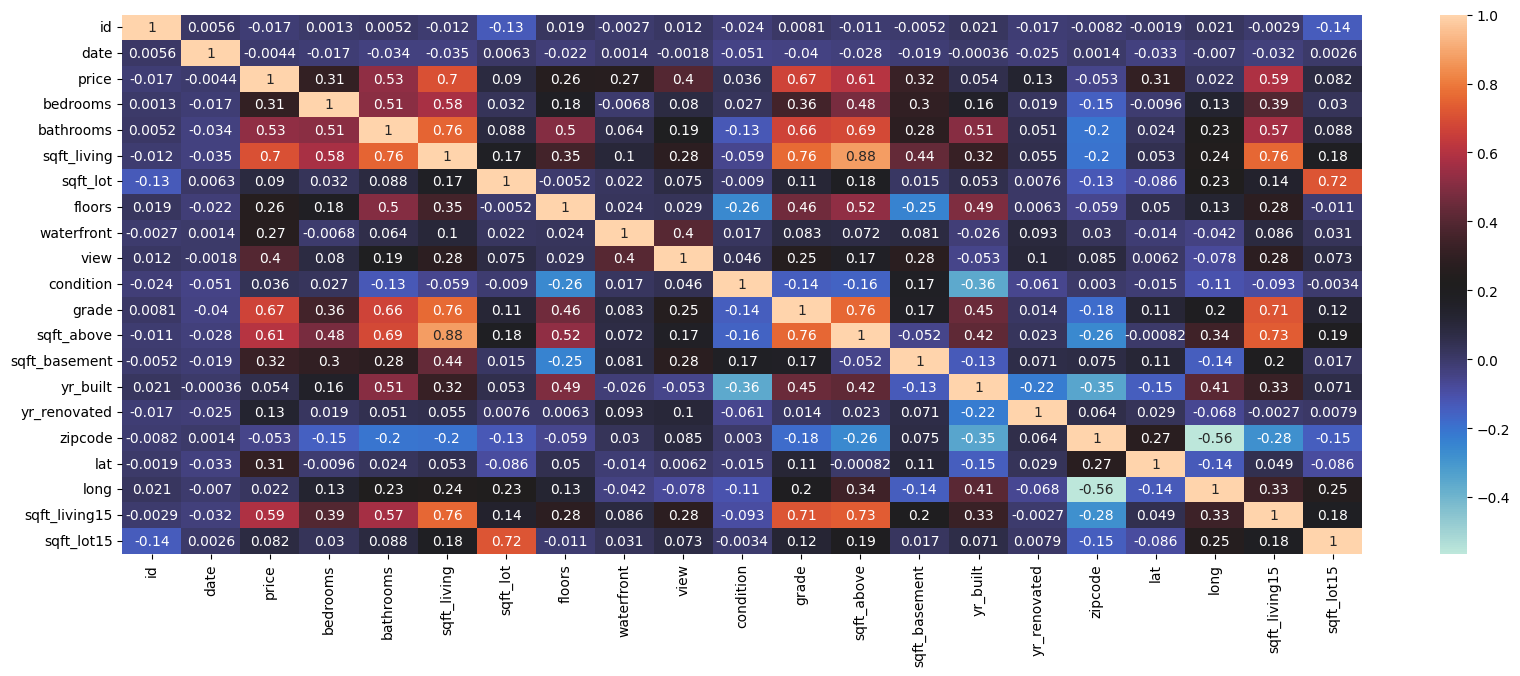

In [20]:
# Set the figure size to make the plot larger and easier to read
plt.figure(figsize=(20, 7))

# Generate a heatmap to visualize correlations between all numerical features in the dataset
# 'df.corr()' computes the correlation matrix, showing the relationship between each pair of features
# 'annot=True' adds the correlation values as annotations inside the heatmap cells
# 'cmap' is the color map used for the heatmap, 'icefire' gives a gradient color scheme
sns.heatmap(data.corr(), annot=True, cmap='icefire')

Preparation



Feature Engineering For EDA

Create Grouping from grade based on the documentation
- 1 - 5 low quality construction & design
- 6 - 10 average quality consturction & design
- 11 - 13 high quality of construction & design

Create building age column by substracting the date yeat with yr_built     
column age column
- bin the age to create categorical column based on the building age

Create Price per sqft column by dividing price and sqft lot

Binning Price Columns


In [21]:
# Define the bin edges for categorizing the 'grade' column
bin_quality =[1,5,10,13]
# Define the labels for each category corresponding to the bins
label = ['Low', 'Average', 'High']

# Create a new column 'Quality' in the DataFrame 'df'
# The pd.cut function will categorize the values in the 'grade' column based on the defined bins
data['Quality'] = pd.cut(data['grade'], bins = bin_quality, labels = label)

# Display the first few rows of the DataFrame to see the newly added 'Quality' column
data.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,Quality
0,7129300520,2014-10-13,221900.0,3,1.00,1180,5650,1.0,0,0,...,1180,0,1955,0,98178,47.5112,-122.257,1340,5650,Average
1,6414100192,2014-12-09,538000.0,3,2.25,2570,7242,2.0,0,0,...,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639,Average
2,5631500400,2015-02-25,180000.0,2,1.00,770,10000,1.0,0,0,...,770,0,1933,0,98028,47.7379,-122.233,2720,8062,Average
3,2487200875,2014-12-09,604000.0,4,3.00,1960,5000,1.0,0,0,...,1050,910,1965,0,98136,47.5208,-122.393,1360,5000,Average
4,1954400510,2015-02-18,510000.0,3,2.00,1680,8080,1.0,0,0,...,1680,0,1987,0,98074,47.6168,-122.045,1800,7503,Average


In [22]:
# Calculate the age of a property based on its year of construction.
# 'date' column contains the current date (as a datetime object).
# 'yr_built' column contains the year the property was built.

# Subtract the year built from the current year to get the age of the property.
data['age'] = data['date'].dt.year - data['yr_built']  # Calculate age of property


In [23]:
data.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,Quality,age
0,7129300520,2014-10-13,221900.0,3,1.00,1180,5650,1.0,0,0,...,0,1955,0,98178,47.5112,-122.257,1340,5650,Average,59
1,6414100192,2014-12-09,538000.0,3,2.25,2570,7242,2.0,0,0,...,400,1951,1991,98125,47.7210,-122.319,1690,7639,Average,63
2,5631500400,2015-02-25,180000.0,2,1.00,770,10000,1.0,0,0,...,0,1933,0,98028,47.7379,-122.233,2720,8062,Average,82
3,2487200875,2014-12-09,604000.0,4,3.00,1960,5000,1.0,0,0,...,910,1965,0,98136,47.5208,-122.393,1360,5000,Average,49
4,1954400510,2015-02-18,510000.0,3,2.00,1680,8080,1.0,0,0,...,0,1987,0,98074,47.6168,-122.045,1800,7503,Average,28


In [24]:
# Sort the 'age' column in ascending order to view the ages of the houses
data['age'].sort_values()


19805     -1
17098     -1
20852     -1
14489     -1
1763      -1
        ... 
11251    115
3977     115
11610    115
3882     115
9005     115
Name: age, Length: 21613, dtype: int64

- The 'age' column indicates the age of each house in years.
-  The output above shows the sorted ages, with some houses having an age of -1.
- A negative age indicates that these houses were sold before they were even built,
- suggesting that the sale occurred within the first year of construction or before completion.

- The output also reveals that the oldest house in the dataset is 115 years old,
- indicating that this house was built a long time ago and has been around for over a century.

- The displayed output lists the ages of various houses:
- The first few entries show houses with an age of -1 (indicating they were sold quickly).
- The latter part of the output shows houses that are 115 years old.

In [25]:
# Define the bin edges for grouping the 'age' column
bin_age = [-2, 0, 5, 10, 25, 50, 75, 100, 100000]

# Define labels for the bins that will be assigned to each group
labels = ['<1', '1-5', '6-10', '11-25', '26-50', '51-75', '76-100', '>100']

# Use pd.cut() to bin the 'age' column into the defined groups
# This creates a new column 'age_group' in the DataFrame 'df'
data['age_group'] = pd.cut(data['age'], bins=bin_age, labels=labels)

# Display the first few rows of the updated DataFrame to check the new 'age_group' column
data.head()


,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,Quality,age,age_group
0,7129300520,2014-10-13,221900.0,3,1.00,1180,5650,1.0,0,0,...,1955,0,98178,47.5112,-122.257,1340,5650,Average,59,51-75
1,6414100192,2014-12-09,538000.0,3,2.25,2570,7242,2.0,0,0,...,1951,1991,98125,47.7210,-122.319,1690,7639,Average,63,51-75
2,5631500400,2015-02-25,180000.0,2,1.00,770,10000,1.0,0,0,...,1933,0,98028,47.7379,-122.233,2720,8062,Average,82,76-100
3,2487200875,2014-12-09,604000.0,4,3.00,1960,5000,1.0,0,0,...,1965,0,98136,47.5208,-122.393,1360,5000,Average,49,26-50
4,1954400510,2015-02-18,510000.0,3,2.00,1680,8080,1.0,0,0,...,1987,0,98074,47.6168,-122.045,1800,7503,Average,28,26-50


In [26]:
# Calculate price per square foot
data['price_per_sqft'] = data['price'] / data['sqft_lot']

# Display the first few rows of the DataFrame to see the new column
data.head()

# Explanation:
# 1. **data['price_per_sqft']**: This line creates a new column in the DataFrame named 'price_per_sqft'.
# 2. **data['price'] / data['sqft_lot']**: This expression divides the total price of each property by its lot size (in square feet).
#    - **'price'**: This column represents the total price of the property.
#    - **'sqft_lot'**: This column indicates the size of the lot in square feet.

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,Quality,age,age_group,price_per_sqft
0,7129300520,2014-10-13,221900.0,3,1.00,1180,5650,1.0,0,0,...,0,98178,47.5112,-122.257,1340,5650,Average,59,51-75,39.274336
1,6414100192,2014-12-09,538000.0,3,2.25,2570,7242,2.0,0,0,...,1991,98125,47.7210,-122.319,1690,7639,Average,63,51-75,74.288870
2,5631500400,2015-02-25,180000.0,2,1.00,770,10000,1.0,0,0,...,0,98028,47.7379,-122.233,2720,8062,Average,82,76-100,18.000000
3,2487200875,2014-12-09,604000.0,4,3.00,1960,5000,1.0,0,0,...,0,98136,47.5208,-122.393,1360,5000,Average,49,26-50,120.800000
4,1954400510,2015-02-18,510000.0,3,2.00,1680,8080,1.0,0,0,...,0,98074,47.6168,-122.045,1800,7503,Average,28,26-50,63.118812


Binning Price Columns

In [27]:
# Define the bin edges for categorizing price ranges
bin_price = [0, 250000, 500000, 750000, 1000000, 2000000, data['price'].max()]
# Define labels for each price category
label_price = ['upto 250k', 'upto 500k', 'upto 750k', 'upto 1mil', 'upto 2mil', 'more than 2 mil']

# Create a new column 'price_group' in the DataFrame
# This column categorizes 'price' into defined ranges using pd.cut()
data['price_group'] = pd.cut(data['price'], bins=bin_price, labels=label_price)

# Display the first few rows of the DataFrame to see the new 'price_group' column
data.head()


,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,zipcode,lat,long,sqft_living15,sqft_lot15,Quality,age,age_group,price_per_sqft,price_group
0,7129300520,2014-10-13,221900.0,3,1.00,1180,5650,1.0,0,0,...,98178,47.5112,-122.257,1340,5650,Average,59,51-75,39.274336,upto 250k
1,6414100192,2014-12-09,538000.0,3,2.25,2570,7242,2.0,0,0,...,98125,47.7210,-122.319,1690,7639,Average,63,51-75,74.288870,upto 750k
2,5631500400,2015-02-25,180000.0,2,1.00,770,10000,1.0,0,0,...,98028,47.7379,-122.233,2720,8062,Average,82,76-100,18.000000,upto 250k
3,2487200875,2014-12-09,604000.0,4,3.00,1960,5000,1.0,0,0,...,98136,47.5208,-122.393,1360,5000,Average,49,26-50,120.800000,upto 750k
4,1954400510,2015-02-18,510000.0,3,2.00,1680,8080,1.0,0,0,...,98074,47.6168,-122.045,1800,7503,Average,28,26-50,63.118812,upto 750k


Exploratory Data Analysis

In [28]:
data.describe()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,age,price_per_sqft
count,2.161300e+04,21613,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,...,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,4.580302e+09,2014-10-29 04:38:01.959931648,5.400881e+05,3.372646,2.115798,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,...,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652,43.317818,88.966710
min,1.000102e+06,2014-05-02 00:00:00,7.500000e+04,1.000000,0.500000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,...,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000,-1.000000,0.163119
25%,2.123049e+09,2014-07-22 00:00:00,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,...,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000,18.000000,33.333333
50%,3.904930e+09,2014-10-16 00:00:00,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,...,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000,40.000000,59.223301
75%,7.308900e+09,2015-02-17 00:00:00,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,...,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000,63.000000,107.594937
max,9.900000e+09,2015-05-27 00:00:00,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,...,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000,115.000000,2027.208539
std,2.876566e+09,NaN,3.671272e+05,0.926423,0.768823,918.440897,4.142051e+04,0.539989,0.086517,0.766318,...,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631,29.375493,94.055247


Univariate Analysis

In [29]:
data.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15', 'Quality', 'age',
       'age_group', 'price_per_sqft', 'price_group'],
      dtype='object')

In [30]:
# Calculate the normalized value counts of the 'bedrooms' column
data['bedrooms'].value_counts(normalize=True)
# This code computes the proportion of each unique value (number of bedrooms) in the 'bedrooms' column.
# The 'normalize=True' argument means that the output will be a percentage rather than a count.

bedrooms
3     0.455143
4     0.318419
2     0.127701
5     0.074076
6     0.012585
1     0.009207
7     0.001758
8     0.000601
9     0.000278
10    0.000139
11    0.000046
33    0.000046
Name: proportion, dtype: float64

 The output indicates the distribution of bedrooms:
 For instance, 45.51% of houses have 3 bedrooms, while 31.84% have 4 bedrooms.
 This analysis helps us understand the most common number of bedrooms in the dataset.

 Example Output:
- 3     0.455143  # Nearly half of the houses have 3 bedrooms
- 4     0.318419  # About 31.84% have 4 bedrooms
- 2     0.127701  # 12.77% have 2 bedrooms


In [31]:
bathroom_counts = data['bathrooms'].value_counts(normalize=True)

# Display the proportion of houses with different numbers of bathrooms
# For example, about 24.89% of houses have 2.5 bathrooms.
print(bathroom_counts)

bathrooms
2.50    0.248924
1.00    0.178226
1.75    0.141026
2.25    0.095174
2.00    0.089298
1.50    0.066904
2.75    0.054828
3.00    0.034840
3.50    0.033822
3.25    0.027252
3.75    0.007172
4.00    0.006293
4.50    0.004627
4.25    0.003655
0.75    0.003331
4.75    0.001064
5.00    0.000972
5.25    0.000601
5.50    0.000463
1.25    0.000416
6.00    0.000278
0.50    0.000185
5.75    0.000185
6.75    0.000093
8.00    0.000093
6.50    0.000093
6.25    0.000093
7.75    0.000046
7.50    0.000046
Name: proportion, dtype: float64


The results show that the number of bathrooms in houses is more varied compared 
 to the number of bedrooms. Notably, almost a quarter of the houses in King County 
 have 2.5 bathrooms, indicating this might be a common feature in this area. 

 This analysis is useful for understanding housing trends and preferences in 
 King County, which can aid in real estate decision-making or market analysis.

In [32]:
# Count the occurrences of each category in the 'age_group' column
data['age_group'].value_counts()


age_group
26-50     5909
51-75     5403
11-25     3747
76-100    2086
6-10      2067
>100      1012
1-5        947
<1         442
Name: count, dtype: int64

The output shows the distribution of houses based on their age group in King County.
This helps us understand the demographic of the housing market, specifically how many houses fall into each age category.
 
 The result indicates the following distribution of houses in terms of age:
 - 26-50 years old: 5909 houses (majority)
 - 51-75 years old: 5403 houses
 - 11-25 years old: 3747 houses
 - 76-100 years old: 2086 houses
 - 6-10 years old: 2067 houses
 - More than 100 years old: 1012 houses
 - 1-5 years old: 947 houses
 - Less than 1 year old: 442 houses

In [33]:
# Count the occurrences of each unique value in the 'yr_renovated' column
# This helps to understand how many houses have been renovated in each specific year

data['yr_renovated'].value_counts()

# Display the counts of renovations
#print(renovation_counts)

yr_renovated
0       20699
2014       91
2013       37
2003       36
2005       35
        ...  
1948        1
1951        1
1959        1
1934        1
1944        1
Name: count, Length: 70, dtype: int64

-The 'yr_renovated' column indicates the year when a house was last renovated. 
- By counting the occurrences of each year, we can identify trends in renovations. 
- The output shows that most houses in this dataset have never been renovated (value '0' appears 20,699 times). 
- This information is crucial for understanding the state of the housing market and can impact analyses related to property values and investment opportunities

The 'zipcode' column indicates the geographical areas where the houses are located.
- By counting the occurrences of each zip code, we can determine which areas have the highest concentration of houses in this dataset.
- The output shows that the most common zip code is 98103, with 602 houses listed, 
- followed by 98038 and 98115, which indicates popular or densely populated areas.
- This information is important for real estate analysis, market trends, and understanding location-based preferences in housing.

In [34]:
# Count the occurrences of each unique value in the 'Quality' column
# This shows the distribution of house conditions in terms of quality: 'Average', 'High', and 'Low'

data['Quality'].value_counts()

Quality
Average    20836
High         502
Low          274
Name: count, dtype: int64

- The 'Quality' column represents the overall condition of the houses in the dataset.
- By counting the number of houses with 'Average', 'High', or 'Low' quality, we get a clearer picture of the general state of the houses.
- The result shows that most houses (20,836) are in 'Average' condition, with fewer houses in 'High' or 'Low' quality.
- This insight can be useful in understanding how the condition of houses may impact their pricing, market value, or renovation needs